In [1]:
# Import modules
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
# numpy, matplotlib, seaborn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

In [2]:
# Download data
!wget -O training_data.csv http://handsonml.control.lth.se/data/training_data.csv
!wget -O songs_to_classify.csv http://handsonml.control.lth.se/data/songs_to_classify.csv

--2021-10-01 14:56:45--  http://handsonml.control.lth.se/data/training_data.csv
Resolving handsonml.control.lth.se (handsonml.control.lth.se)... 130.235.83.49, 2001:470:28:988:1911:2012:4200:0
Connecting to handsonml.control.lth.se (handsonml.control.lth.se)|130.235.83.49|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54950 (54K) [text/csv]
Saving to: ‘training_data.csv’

training_data.csv   100%[===================>]  53.66K   200KB/s    in 0.3s    

2021-10-01 14:56:46 (200 KB/s) - ‘training_data.csv’ saved [54950/54950]

--2021-10-01 14:56:46--  http://handsonml.control.lth.se/data/songs_to_classify.csv
Resolving handsonml.control.lth.se (handsonml.control.lth.se)... 130.235.83.49, 2001:470:28:988:1911:2012:4200:0
Connecting to handsonml.control.lth.se (handsonml.control.lth.se)|130.235.83.49|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14306 (14K) [text/csv]
Saving to: ‘songs_to_classify.csv’

songs_to_classify.c 100%[==========

In [3]:
# Load data
train = pd.read_csv("training_data.csv")
test_classify = pd.read_csv("songs_to_classify.csv")

In [16]:
df = pd.read_csv('training_data.csv')
# select which features to use

X = df.drop(columns=['label'])
y = df.loc[:,'label'].values

features = ['danceability','acousticness', 'instrumentalness', 'valence',
            'loudness', 'liveness', 'speechiness', 'tempo', 'duration']
features_cat = ['key', 'mode', 'time_signature']

# Scaling the dataset to ensure more accurate results
from sklearn.preprocessing import StandardScaler
numerical_preprocessor = StandardScaler()
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, features_cat),
    ('standard-scaler', numerical_preprocessor, features)])

Implementation for Random Forests

In [17]:
clf = Pipeline(steps = [('preprocessor', preprocessor), ('classifier', RandomForestClassifier(n_estimators=100,max_depth=3))])

In [18]:
# Split into dataset into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
clf.fit(X_train,np.ravel(y_train))
print(clf.score(X_train,np.ravel(y_train)))
print('model score: %.3f' % clf.score(X_test,np.ravel(y_test)))

0.8766666666666667
model score: 0.807


In [20]:
# Calculate accuracy: Evaluate the models using cross-validation
# Make Predictions on Test Data and compare with truth
scores = cross_val_score(clf, X, np.ravel(y), cv=25)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean()*100, scores.std()))
score = clf.score(X_test, np.ravel(y_test))
print('Test score: ', '{0:.4f}'.format(score*100))

81.60 accuracy with a standard deviation of 0.07
Test score:  80.6667


In [21]:
clf = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 1000],
    'max_depth': [2, 3, 4],
    'max_features': [0.1, 0.3],
    'min_samples_leaf': [0.1, 0.3, 1, 2, 3]
    }

search = GridSearchCV(clf, param_grid, cv=4, verbose=1,n_jobs=-1)

search.fit(X_train, np.ravel(y_train))
score = search.score(X_test, np.ravel(y_test))
print("Best CV score: {} using {}".format(search.best_score_, search.best_params_))
print("Test accuracy: {}".format(score))

Fitting 4 folds for each of 60 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.3min


Best CV score: 0.8283333333333334 using {'max_depth': 4, 'max_features': 0.3, 'min_samples_leaf': 2, 'n_estimators': 100}
Test accuracy: 0.8266666666666667


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.9min finished


In [22]:
from sklearn.model_selection import cross_val_score
clfCV = RandomForestClassifier(n_estimators=1000,max_depth=3,min_samples_leaf = 2,max_features= 0.3)

# To obtain the estimate of the performance including features, good!
score=cross_val_score(clfCV, X, y, cv=20)

In [23]:
clfCV.fit(X_train,np.ravel(y_train))
print('Training score: ', clfCV.score(X_train,np.ravel(y_train)))
print('Test score: ', clfCV.score(X_test,np.ravel(y_test)))

Training score:  0.88
Test score:  0.8266666666666667


In [24]:
y_pred = clfCV.predict(X_test)

In [25]:
score_test = clfCV.score(X_test, y_test)
print('Test score: ', score_test )

Test score:  0.8266666666666667


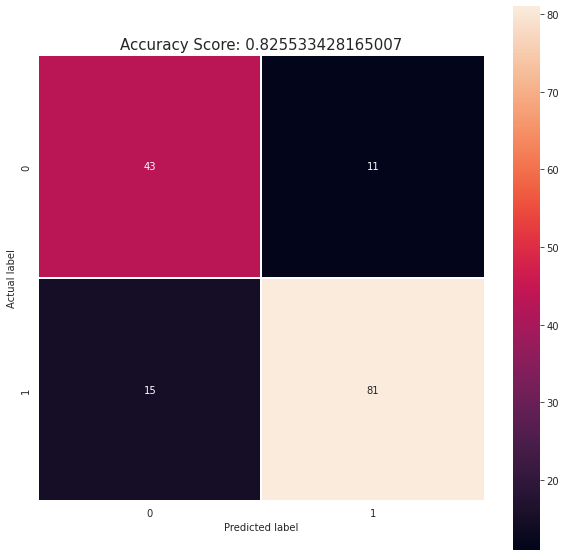

In [26]:
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=1, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Accuracy Score: {0}'.format(score.mean()), size = 15);

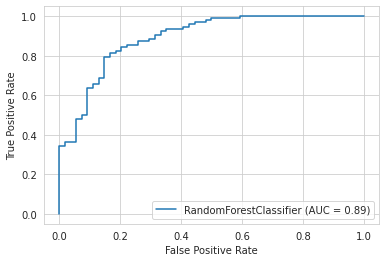

In [27]:
from sklearn import metrics
metrics.plot_roc_curve(clfCV, X_test, y_test)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clfCV.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77        54
           1       0.88      0.84      0.86        96

    accuracy                           0.83       150
   macro avg       0.81      0.82      0.81       150
weighted avg       0.83      0.83      0.83       150



Text(0.5, 0, 'Random Forest Feature Importance')

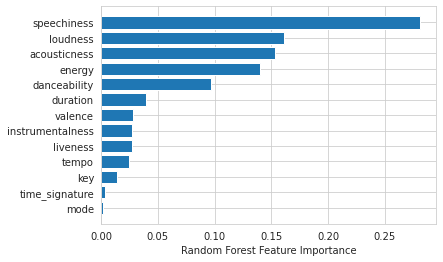

In [ ]:
clfCV.feature_importances_
sorted_idx = clfCV.feature_importances_.argsort()
plt.barh(train.columns[sorted_idx], clfCV.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [15]:
final_y = modelCV.predict(test_classify)

NameError: ignored

In [ ]:
final =''.join(str(final_y).split(' ,')).replace(" ", "").replace('\n', "")
final

Normalization

Normalizing input is something that can have a huge impact for some classification methods. For decision trees it will not make a difference, but for kNN it can affect the outcome by quite a bit. Let's try the exact same but with a rescaler in the pipeline.

**Ensambles**

As discussed in the lecture bagging will help reduce variance, but not bias, and will show the greatest effect for unstable classifiers such as decision trees compared to more stable ones such as kNN. So if we pick classifiers with little to no bias, but high variance, and just train a bunch of them we can hopefully achieve both low variance and low bias.

Using bagging on decision trees we get what is known as a random forest, a bunch of trees trained on different subsets of the data and features, and maybe with different parameter settings to increase variance among them.

Bagging is a type of ensable algorithm where we create random subsets of the data and use them for training multiple different classifiers. Bootstrapping is the part of bagging where we resample uniformly with replacement, i.e. the same data can be sampled multiple times.

**Grid search**

As you might have experienced above it is not always easy to find good parameters by hand, and as the problem gets more complex you will have even more parameters to tune. Instead it can be useful to automate this process and make the computer find the some good hyperparameters for you.

Grid search will try all possible combinations of parameters you supply to it and see which one gives the best cross validation score. When fitting the data does not take long time it can be a very useful tool, but the time it takes will grow quickly with the number of parameters and the possible variations of the parameters. For more complex problems there faster methods to search for hyperparameters, but we won't go into them now.

**Optimazed Random Tree**

In [ ]:
ind=np.array(list(range(0,11)))
ind[clfCV.feature_importances_>0.050]

**The optimazed Random Tree**

Features Importance

In [ ]:

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_trainn,y_train)
for feature, importance in zip(train.columns.values,rf.feature_importances_):
  print(feature,'{:5.4f}'.format(importance))